##### 602 Project: 311 City Service Requests in DC Completion Time Prediction

###### Basic EDA

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns

In [66]:
#use the csv file GateArrivalDelay.csv.
data=pd.read_csv("C:/Users/manis/OneDrive/Documents/DATA-602 - Data Analysis & ML/Project/311_City_Service_Requests_in_2021.csv")
#data=pd.read_csv("sample_311_City_Service_Requests_in_2021.csv")
data.head()

C:\Users\manis\AppData\Local\Temp\ipykernel_41904\2394893822.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:/Users/manis/OneDrive/Documents/DATA-602 - Data Analysis & ML/Project/311_City_Service_Requests_in_2021.csv")


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:32:05+00,2021/01/06 15:34:42+00,...,20001.0,230050,5,NaN,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:06:02+00,2021/01/01 05:07:01+00,...,20032.0,301360,8,NaN,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 05:33:08+00,2021/01/05 05:55:04+00,...,20011.0,252336,4,NaN,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 11:58:18+00,2021/01/04 12:54:36+00,...,20019.0,24709,7,NaN,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},NaN,NaN,NaN,NaN
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 06:05:25+00,2021/01/26 21:40:13+00,...,20016.0,266186,3,NaN,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},NaN,NaN,NaN,NaN


In [67]:
data.shape

(360816, 36)

In [68]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS',
       'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED'],
      dtype='object')

In [69]:
data.nunique()

X                              98538
Y                              98538
OBJECTID                      360816
SERVICECODE                      118
SERVICECODEDESCRIPTION           119
SERVICETYPECODEDESCRIPTION        25
ORGANIZATIONACRONYM               13
SERVICECALLCOUNT                   1
ADDDATE                       356709
RESOLUTIONDATE                344718
SERVICEDUEDATE                282738
SERVICEORDERDATE              356709
INSPECTIONFLAG                     0
INSPECTIONDATE                     0
INSPECTORNAME                      0
SERVICEORDERSTATUS                12
STATUS_CODE                        0
SERVICEREQUESTID              360816
PRIORITY                           6
STREETADDRESS                 101041
XCOORD                         93602
YCOORD                         93978
LATITUDE                       97667
LONGITUDE                      97908
CITY                               1
STATE                              1
ZIPCODE                          111
M

In [2]:
%%time
#dropping columns
df = data.drop(['INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME', 'STATUS_CODE', 
                    'GIS_ID','CREATOR','CREATED','EDITOR' ,'EDITED','SERVICECALLCOUNT'],axis=1)

NameError: name 'data' is not defined

In [71]:
df.dtypes

X                             float64
Y                             float64
OBJECTID                        int64
SERVICECODE                    object
SERVICECODEDESCRIPTION         object
SERVICETYPECODEDESCRIPTION     object
ORGANIZATIONACRONYM            object
ADDDATE                        object
RESOLUTIONDATE                 object
SERVICEDUEDATE                 object
SERVICEORDERDATE               object
SERVICEORDERSTATUS             object
SERVICEREQUESTID               object
PRIORITY                       object
STREETADDRESS                  object
XCOORD                        float64
YCOORD                        float64
LATITUDE                      float64
LONGITUDE                     float64
CITY                           object
STATE                          object
ZIPCODE                       float64
MARADDRESSREPOSITORYID          int64
WARD                           object
DETAILS                        object
GLOBALID                       object
dtype: objec

In [1]:
df.count()

NameError: name 'df' is not defined

In [72]:
# Converting the Objects to datetime for the date realted columns:
df['ADDDATE'] = pd.to_datetime(df['ADDDATE'])
df['RESOLUTIONDATE'] = pd.to_datetime(df['RESOLUTIONDATE'])
df['SERVICEDUEDATE'] = pd.to_datetime(df['SERVICEDUEDATE'])
df['SERVICEORDERDATE'] = pd.to_datetime(df['SERVICEORDERDATE'])

df.dtypes

X                                         float64
Y                                         float64
OBJECTID                                    int64
SERVICECODE                                object
SERVICECODEDESCRIPTION                     object
SERVICETYPECODEDESCRIPTION                 object
ORGANIZATIONACRONYM                        object
ADDDATE                       datetime64[ns, UTC]
RESOLUTIONDATE                datetime64[ns, UTC]
SERVICEDUEDATE                datetime64[ns, UTC]
SERVICEORDERDATE              datetime64[ns, UTC]
SERVICEORDERSTATUS                         object
SERVICEREQUESTID                           object
PRIORITY                                   object
STREETADDRESS                              object
XCOORD                                    float64
YCOORD                                    float64
LATITUDE                                  float64
LONGITUDE                                 float64
CITY                                       object


In [73]:
# Adding a new column: (target) Timespan to get the timespan of the request completion 
df['Timespan'] = (df['RESOLUTIONDATE'] - df['ADDDATE']).dt.total_seconds()
df.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GLOBALID,Timespan
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:32:05+00:00,2021-01-06 15:34:42+00:00,2021-01-06 23:59:00+00:00,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},468157.0
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:06:02+00:00,2021-01-01 05:07:01+00:00,2021-01-09 04:59:00+00:00,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},59.0
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 05:33:08+00:00,2021-01-05 05:55:04+00:00,2021-01-12 05:33:08+00:00,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},346916.0
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 11:58:18+00:00,2021-01-04 12:54:36+00:00,2021-01-05 04:59:00+00:00,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},262578.0
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 06:05:25+00:00,2021-01-26 21:40:13+00:00,2021-01-12 06:05:25+00:00,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},2216088.0


In [74]:
import pandas as pd
df = df.dropna(subset=['RESOLUTIONDATE'])

In [75]:
# As our target variable (timespan) is Float, to get the corelation between the ADDDATE and RESOLUTIONDATE,
# We are considering the minimum date of ADDDATE and substracting it from each ADDDATE record. 
#Similarlly for the RESOLUTIONDATE column

df['ADDDATE'] = (df['ADDDATE'] - df['ADDDATE'].min()).dt.total_seconds()
df['RESOLUTIONDATE'] = (df['RESOLUTIONDATE'] - df['RESOLUTIONDATE'].min()).dt.total_seconds()
df.head(10)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GLOBALID,Timespan
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1563.0,469661.0,2021-01-06 23:59:00+00:00,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},468157.0
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.0,0.0,2021-01-09 04:59:00+00:00,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},59.0
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1626.0,348483.0,2021-01-12 05:33:08+00:00,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},346916.0
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,24736.0,287255.0,2021-01-05 04:59:00+00:00,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},262578.0
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,3563.0,2219592.0,2021-01-12 06:05:25+00:00,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},2216088.0
5,-76.998094,38.961588,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,3216.0,548247.0,2021-01-08 04:59:00+00:00,...,38.961580,-76.998092,WASHINGTON,DC,20011.0,2761,4,NaN,{B7D25EBE-F303-E2F7-E053-542F520AD49B},545090.0
6,-76.998934,38.961860,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,3355.0,132911.0,2021-01-05 06:01:57+00:00,...,38.961852,-76.998932,WASHINGTON,DC,20011.0,5538,4,NaN,{B7D25EBE-F304-E2F7-E053-542F520AD49B},129615.0
7,-77.024037,38.950293,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,34988.0,552442.0,2021-01-07 23:59:00+00:00,...,38.950285,-77.024035,WASHINGTON,DC,20011.0,251903,4,NaN,{B7D91AC0-3906-F9B3-E053-542F520A2FDD},517513.0
8,-77.040372,38.921705,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,33473.0,461249.0,2021-01-07 04:59:00+00:00,...,38.921697,-77.040369,WASHINGTON,DC,20009.0,235663,1,NaN,{B7D91AC0-3907-F9B3-E053-542F520A2FDD},427835.0
9,-76.949960,38.902276,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,31813.0,33554.0,2021-01-04 13:56:15+00:00,...,38.902268,-76.949958,WASHINGTON,DC,20019.0,309256,7,NaN,{B7D91AC0-3908-F9B3-E053-542F520A2FDD},1800.0


In [76]:
# Finding the correlation between the features with the target variable "Timespan"
correlations = df.corr()
target_correlations = correlations["Timespan"].sort_values(ascending=False)

C:\Users\manis\AppData\Local\Temp\ipykernel_41904\1388245008.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [77]:
target_correlations.head(10)

Timespan                  1.000000
RESOLUTIONDATE            0.626679
MARADDRESSREPOSITORYID    0.108932
YCOORD                    0.053529
Y                         0.053528
LATITUDE                  0.053527
ZIPCODE                  -0.014691
OBJECTID                 -0.019585
ADDDATE                  -0.030313
XCOORD                   -0.035173
Name: Timespan, dtype: float64

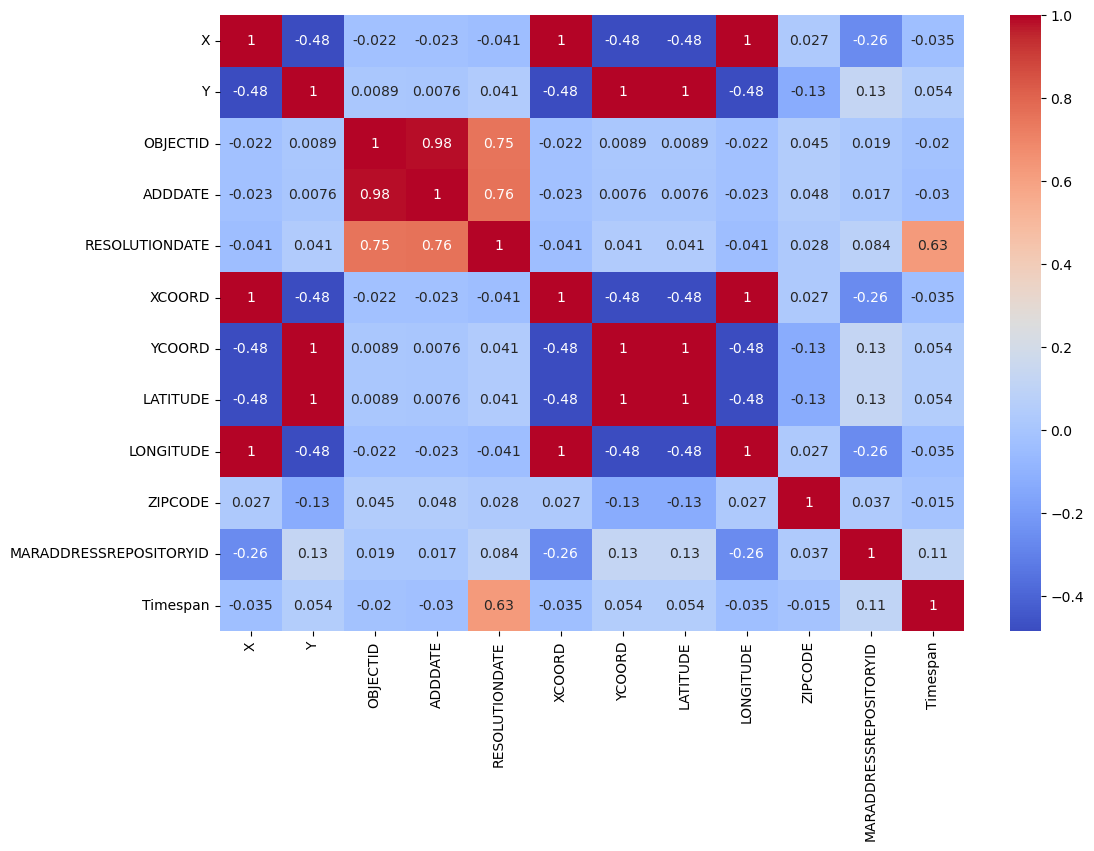

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

In [129]:
# Defining the features and the target of the model
X = df[['ADDDATE', 'RESOLUTIONDATE']] # Features
y = df.Timespan # Target

In [108]:
# Breaking the data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [109]:
print(X_train)

           ADDDATE  RESOLUTIONDATE
21626    2798569.0       3325046.0
237048  21497768.0      22138866.0
209625  19463632.0      19475338.0
217149  19933460.0      22626121.0
49063    5744844.0       5921198.0
...            ...             ...
11357    1454670.0       7893436.0
48496    5684052.0       6075436.0
77924    8715727.0      16906911.0
200740  18774945.0      18776820.0
72331    8153300.0       8753362.0

[249589 rows x 2 columns]


In [110]:
print(y_train)

21626      526536.0
237048     641157.0
209625      11765.0
217149    2692720.0
49063      176413.0
            ...    
11357     6438825.0
48496      391443.0
77924     8191243.0
200740       1934.0
72331      600121.0
Name: Timespan, Length: 249589, dtype: float64


In [111]:
# Importing 'LinearRegression' through linear_model module
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # Instantiate
reg.fit(X_train, y_train) # Fit the train data
r2_train_score = reg.score(X_train, y_train) # Calculating R^2 score for train
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  1.0 

Coefficients of Linear Model: [-1.  1.] 

Intercept: 58.999999990686774


In [112]:
# Finding the predictions of the model for test dataset
y_pred = reg.predict(X_test)
y_pred[:10] # Representing the price prediction for the first 10 data points in test dataset

array([7.6631500e+05, 5.1800000e+03, 2.6713400e+05, 3.2380000e+03,
       2.8250130e+06, 9.6342400e+05, 2.6608784e+07, 9.5538000e+04,
       8.4747000e+04, 1.7430900e+05])

In [113]:
# Evaluating the performance of the model on the test dataset
r2_test_score = reg.score(X_test, y_test) # Calculating R^2 score for train
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  1.0 



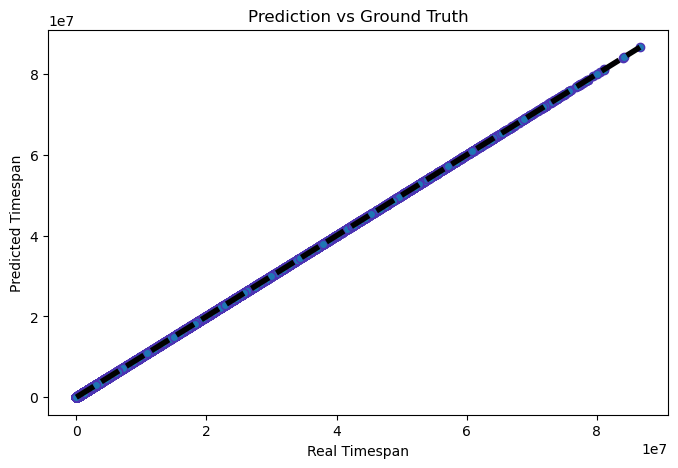

In [114]:
# Let's plot predictions vs ground truth for 'PRICE'
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7)) # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # Draw line y=x
ax.set_xlabel('Real Timespan')
ax.set_ylabel('Predicted Timespan')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

Random forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
rf_clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)


In [128]:

#rf_clf = RandomForestRegressor(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'SIGNMISS'

In [118]:
# Finding the predictions of random forest classifier for train and test subsets
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)


In [119]:
train_y_pred

array([5.26476110e+05, 6.44588870e+05, 1.28140800e+04, ...,
       8.21913225e+06, 1.40077000e+03, 6.00984620e+05])

In [120]:
test_y_pred

array([765831.47,   4425.97, 266087.68, ...,   7002.08, 256180.47,
         3366.03])

In [121]:
r2_train_score = rf_clf.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = rf_clf.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


R^2 score for train dataset =  1.0 

R^2 score for test dataset =  1.0 



In [122]:
from sklearn.ensemble import GradientBoostingRegressor
params= {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
gb_reg = GradientBoostingRegressor(**params) # Instantiating GradientBoostingRegressor
gb_reg.fit(X_train, y_train) 


GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=500)

In [98]:
train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [99]:
r2_train_score = gb_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9502 

R^2 score for test dataset =  0.9526 



In [55]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
# Importing 'xgboost'
import xgboost as xgb
# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.04, subsample=0.8)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.04, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
 # Finding the predictions of XGBoost regressor for train and test subsets
train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)


In [58]:
 r2_train_score = xgb_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


R^2 score for train dataset =  0.9969 

R^2 score for test dataset =  0.9956 



In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Defining the features and the target of the model
X = df[['SERVICECODE']] # Features
y = df.Timespan # Target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['SERVICECODE']

# Create a preprocessor for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the RandomForestRegressor model with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on training data: {r2_train}")
print(f"R^2 on test data: {r2_test}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

NameError: name 'r2_score' is not defined

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Defining the features and the target of the model
X = df[['SERVICECODE','ZIPCODE']] # Features
y = df.Timespan # Target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['SERVICECODE','ZIPCODE']

# Create a preprocessor for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the RandomForestRegressor model with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on training data: {r2_train}")
print(f"R^2 on test data: {r2_test}")


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)



In [25]:
# Fit the model to the training data
gb_classifier.fit(X_train, y_train)



MemoryError: Unable to allocate 368. GiB for an array with shape (249589, 197920) and data type float64

In [ ]:
# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)


In [ ]:
rf_clf.fit(X_train, y_train)

In [ ]:
# Finding the predictions of random forest classifier for train and test subsets
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)